In [14]:
def wiener(im, mysize=None, noise=None):
    """
    Perform a Wiener filter on an N-dimensional array.

    Apply a Wiener filter to the N-dimensional array `im`.

    Parameters
    ----------
    im : ndarray
        An N-dimensional array.
    mysize : int or array_like, optional
        A scalar or an N-length list giving the size of the Wiener filter
        window in each dimension.  Elements of mysize should be odd.
        If mysize is a scalar, then this scalar is used as the size
        in each dimension.
    noise : float, optional
        The noise-power to use. If None, then noise is estimated as the
        average of the local variance of the input.

    Returns
    -------
    out : ndarray
        Wiener filtered result with the same shape as `im`.

    Notes
    -----
    This implementation is similar to wiener2 in Matlab/Octave.
    For more details see [1]_

    References
    ----------
    .. [1] Lim, Jae S., Two-Dimensional Signal and Image Processing,
           Englewood Cliffs, NJ, Prentice Hall, 1990, p. 548.

    Examples
    --------
    >>> from scipy.datasets import face
    >>> from scipy.signal import wiener
    >>> import matplotlib.pyplot as plt
    >>> import numpy as np
    >>> rng = np.random.default_rng()
    >>> img = rng.random((40, 40))    #Create a random image
    >>> filtered_img = wiener(img, (5, 5))  #Filter the image
    >>> f, (plot1, plot2) = plt.subplots(1, 2)
    >>> plot1.imshow(img)
    >>> plot2.imshow(filtered_img)
    >>> plt.show()

    """
    im = np.asarray(im)
    if mysize is None:
        mysize = [3] * im.ndim
    mysize = np.asarray(mysize)
    if mysize.shape == ():
        mysize = np.repeat(mysize.item(), im.ndim)

    # Estimate the local mean
    size = math.prod(mysize)
    lMean = correlate(im, np.ones(mysize), 'same') / size
    print(lMean)

    # Estimate the local variance
    lVar = (correlate(im ** 2, np.ones(mysize), 'same') / size - lMean ** 2)
    print(lVar)

    # Estimate the noise power if needed.
    if noise is None:
        noise = np.mean(np.ravel(lVar), axis=0)
    print(noise)

    res = (im - lMean)
    res *= (1 - noise / lVar)
    res += lMean
    out = np.where(lVar < noise, lMean, res)

    return out

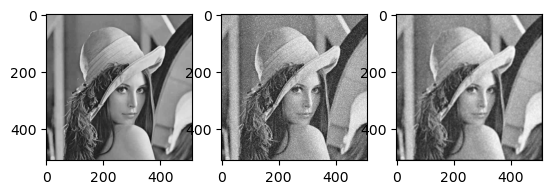

In [53]:
import cv2
from scipy.datasets import face
from scipy.signal import wiener
import matplotlib.pyplot as plt
import numpy as np
# rng = np.random.default_rng()
# img = rng.random((40, 40))    #Create a random image
img = cv2.imread('lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gaussian_noise = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)  #
gaussian_noise = cv2.randn(gaussian_noise, 0, 100)
gaussian_noise = (gaussian_noise*0.5).astype(np.uint8)
img_noise = cv2.add(img, gaussian_noise)

filtered_img = wiener(img_noise, (5, 5), 10000)  #Filter the image
f, (plot1, plot2, plot3) = plt.subplots(1, 3)
plot1.imshow(img, cmap='gray')
plot2.imshow(img_noise, cmap='gray')
plot3.imshow(filtered_img, cmap='gray')
plt.show()

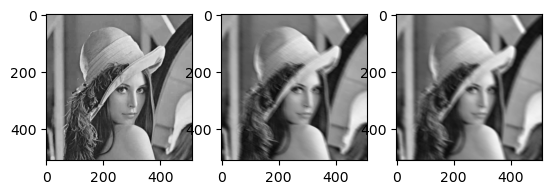

In [51]:
# 这里生成任意角度的运动模糊kernel的矩阵， degree越大，模糊程度越高
image = img
degree=15
angle=20
M = cv2.getRotationMatrix2D((degree/2, degree/2), angle, 1)
motion_blur_kernel = np.diag(np.ones(degree))
motion_blur_kernel = cv2.warpAffine(motion_blur_kernel, M, (degree, degree))

motion_blur_kernel = motion_blur_kernel / degree        
blurred = cv2.filter2D(image, -1, motion_blur_kernel)
# convert to uint8
cv2.normalize(blurred, blurred, 0, 255, cv2.NORM_MINMAX)
blurred = np.array(blurred, dtype=np.uint8)

filtered_img_motion = wiener(blurred, (5, 5), 10)  #Filter the image
f, (plot1, plot2, plot3) = plt.subplots(1, 3)
plot1.imshow(image, cmap='gray')
plot2.imshow(blurred, cmap='gray')
plot3.imshow(filtered_img_motion, cmap='gray')
plt.show()